<a href="https://colab.research.google.com/github/AACRobinson/IMLO-Assessment/blob/main/IMLO_Week_10_Practical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PyTorch Tutorial**

In [25]:
#Tensor - A multidimensional array/matrix, common in PyTorch

import torch
import numpy as np

## **Initialising Tensors**

In [26]:
#1. Directly from data
data1 = [[1, 2], [3, 4]]
data2 = [[1.0], [2.0], [3.0], [4.0]]
tensorData1 = torch.tensor(data1)
tensorData2 = torch.tensor(data2)
print(tensorData1, tensorData1.dtype)
print(tensorData2, tensorData2.dtype)

#2. From (an to) NumPy arrays
np_array1 = np.array(data1)
tensorNp1 = torch.from_numpy(np_array1)
np_array2 = tensorNp1.numpy()
print(tensorNp1)
print(np_array2)

#3. From another tensor
tensorOf1s = torch.ones_like(tensorData2) #Same dimensions and datatype as tensorData2
print(tensorOf1s)
tensorOf0s = torch.zeros((3, 3)) #Dimensions of (3, 3)
print(tensorOf0s)
tensorRandom = torch.rand_like(tensorData1, dtype=torch.float) #Same dimensions as tensorData1, but float datatype
print(tensorRandom)

tensor([[1, 2],
        [3, 4]]) torch.int64
tensor([[1.],
        [2.],
        [3.],
        [4.]]) torch.float32
tensor([[1, 2],
        [3, 4]])
[[1 2]
 [3 4]]
tensor([[1.],
        [1.],
        [1.],
        [1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
tensor([[0.9305, 0.0494],
        [0.5187, 0.6490]])


### **Tensor Operations**

In [27]:
#Can run these operations on a GPU - Allocate  GPU to run on with Runtime > Change Runtime Type > GPU

#Move a tensor to the GPU
if torch.cuda.is_available():
  tensorData1 = tensorData1.to('cuda')
  tensorData2 = tensorData2.to('cuda')
  #To prevent errors between tensors due to operations with them being on the cpu/cuda, will move them off
  tensorData1 = tensorData1.to('cpu')
  tensorData2 = tensorData2.to('cpu')


#Tensor slicing - identical to NumPy
tensor4x4 = torch.zeros(4, 4)
tensor4x4[1] = 1
tensor4x4[:, 2] = 1
print(tensor4x4)
print("Row 0", tensor4x4[0])
print("Column 0", tensor4x4[:, 0])
print("Row n", tensor4x4[-1])
print("Column n", tensor4x4[..., -1], "\n")


#Tensor type conversion
print(tensor4x4, tensor4x4.dtype)
tensor4x4 = tensor4x4.to(int)
print(tensor4x4, tensor4x4.dtype, "\n")


#Tensor concatenation
tensor4x8 = torch.cat([tensor4x4, tensor4x4]) #dim=0
tensor8x4 = torch.cat([tensor4x4, tensor4x4], dim=1)
print(tensor4x8)
print(tensor8x4, "\n")


#Tensor arithmetic - identical to NumPy
tensorMul2_2 = tensorData2 @ tensorData2.T
tensorMul1_1 = tensorData1.to(float).matmul(tensorData1.to(float))
tensorMul2_4x4 = torch.rand_like(tensorData2)
torch.mul(tensorData2, tensor4x4, out=tensorMul2_4x4)
print(tensorMul2_2)
print(tensorMul1_1)
print(tensorMul2_4x4, "\n")


#Get the sum of all values in a tensor (and convert to corresponding datatype)
sumOfMul2_4x4 = tensorMul2_4x4.sum()
sumOfMul2_4x4Object = sumOfMul2_4x4.item()
print(sumOfMul2_4x4Object, type(sumOfMul2_4x4Object), "\n")


#Add a scalar to all values in the tensor
tensor4x4.add_(2)
print(tensor4x4)

tensor([[0., 0., 1., 0.],
        [1., 1., 1., 1.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.]])
Row 0 tensor([0., 0., 1., 0.])
Column 0 tensor([0., 1., 0., 0.])
Row n tensor([0., 0., 1., 0.])
Column n tensor([0., 1., 0., 0.]) 

tensor([[0., 0., 1., 0.],
        [1., 1., 1., 1.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.]]) torch.float32
tensor([[0, 0, 1, 0],
        [1, 1, 1, 1],
        [0, 0, 1, 0],
        [0, 0, 1, 0]]) torch.int64 

tensor([[0, 0, 1, 0],
        [1, 1, 1, 1],
        [0, 0, 1, 0],
        [0, 0, 1, 0],
        [0, 0, 1, 0],
        [1, 1, 1, 1],
        [0, 0, 1, 0],
        [0, 0, 1, 0]])
tensor([[0, 0, 1, 0, 0, 0, 1, 0],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 1, 0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 0, 1, 0]]) 

tensor([[ 1.,  2.,  3.,  4.],
        [ 2.,  4.,  6.,  8.],
        [ 3.,  6.,  9., 12.],
        [ 4.,  8., 12., 16.]])
tensor([[ 7., 10.],
        [15., 22.]], dtype=torch.float64)
tensor([[0., 0., 1., 0.],
        [2., 2.,

<ipython-input-27-e7812767c14f>:40: UserWarning: An output with one or more elements was resized since it had shape [4, 1], which does not match the required output shape [4, 4]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at ../aten/src/ATen/native/Resize.cpp:28.)
  torch.mul(tensorData2, tensor4x4, out=tensorMul2_4x4)


### **NumPy Bridging**

In [28]:
#Tensors on the CPU can share memory locations with NumPy arrays - so data can be shared between them

tensorBridge = torch.ones(5)
numpyBridge = tensorBridge.numpy()
print("Tensor: ", tensorBridge, "\n", "NumPy: ", numpyBridge, "\n")

tensorBridge.add_(1)
print("Tensor: ", tensorBridge, "\n", "NumPy: ", numpyBridge, "\n")

np.add(numpyBridge, 1, out=numpyBridge)
print("Tensor: ", tensorBridge, "\n", "NumPy: ", numpyBridge, "\n")

Tensor:  tensor([1., 1., 1., 1., 1.]) 
 NumPy:  [1. 1. 1. 1. 1.] 

Tensor:  tensor([2., 2., 2., 2., 2.]) 
 NumPy:  [2. 2. 2. 2. 2.] 

Tensor:  tensor([3., 3., 3., 3., 3.]) 
 NumPy:  [3. 3. 3. 3. 3.] 



## **Datasets and Data Loaders**



In [29]:
import torch
from torch.utils.data import Dataset  #Allows the use of preloaded datasets
from torchvision import datasets  #Allows the use of dataset functions
from torchvision.transforms import ToTensor #Allows the datasets to be imported as Tensors
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root = "data",  #Download the data to here
    train = True,
    download = True,
    transform = ToTensor() #From a FashionMNIST object
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor()
)

### **Iterating and Visualising**

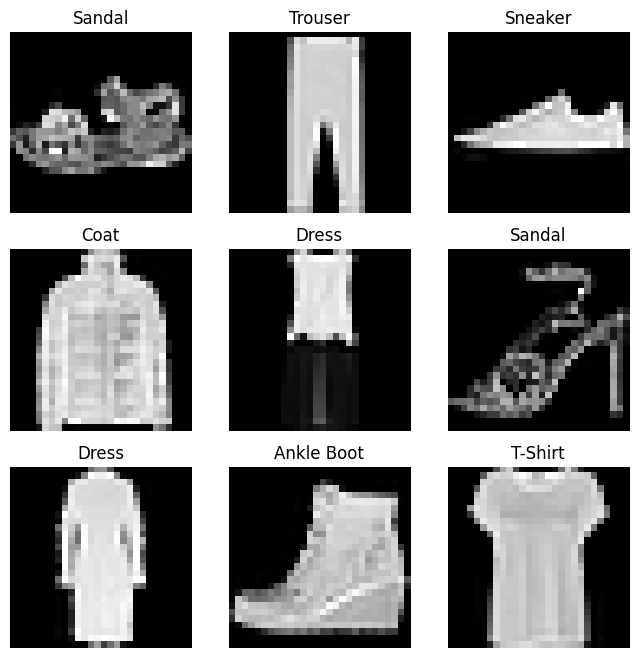

In [30]:
labelMap = {  #A map of labels indicative of the types of images in the dataset (e.g. all T-Shirts in this dataset have a label of 0)
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8)) #How big the plot is
cols, rows = 3, 3
for i in range(1, cols*rows+1) :
  sample_index = torch.randint(len(training_data), size=(1,)).item() #Get a single random item from the training data
  image, label = training_data[sample_index]
  figure.add_subplot(rows, cols, i) #Add the image to the plot with its corresponding label
  plt.title(labelMap[label])
  plt.axis("off")
  plt.imshow(image.squeeze(), cmap="gray")  #Shows the images as greyscale
plt.show()

### **Creating a Custom Dataset**

In [31]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None): #Initialises the annotation file, directory and both transforms
        self.img_labels = pd.read_csv(annotations_file) #The labels.csv file will contain a list of images mapped to their labels (e.g. tshirt1, 1 ... ankleboot999, 9)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self): #Returns the number of samples in the dataset
        return len(self.img_labels)

    def __getitem__(self, idx): #Returns a sample from the dataset at a given index in tensor format (as well as its label)
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

### **Preparing to Train the Dataset with Data Loaders**

Feature batch shape:  torch.Size([64, 1, 28, 28])
Labels batch shape:  torch.Size([64])


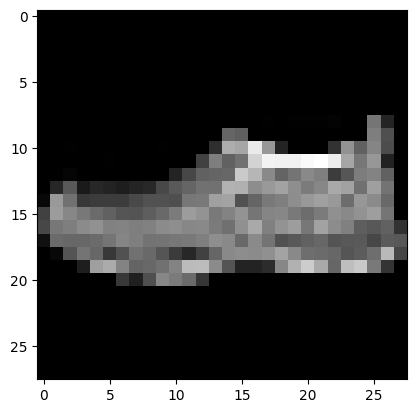

Label:  7


In [32]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True) #Dataloaders speed up data processing and reduce overfitting
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

#Display the image and label
train_features, train_labels = next(iter(train_dataloader))
print("Feature batch shape: ", train_features.size())
print("Labels batch shape: ", train_labels.size())
image = train_features[0].squeeze()
label = train_labels[0].item()
plt.imshow(image, cmap="gray")
plt.show()
print("Label: ", label)

## **Transformations**

In [33]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda #We use these to format the data to make it suitable for training
                                                    ##ToTensor - Converts NpArrays into tensors
                                                    ##Lambda - Applies user defined lambda functions
                                                    ###One hot encoding - Creates a zero tensor of size 10, calls scatter, assigning a 1 at index given by y

trds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(), #Modify the features (to a tensor)
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1)) #Modify the labels (to one hot encoded tensors)
)

## **Building a NN**

In [34]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

#Want to train the model on the fastest hardware accelerator (GPU/MPS) if possible - check to see if available, else use CPU - can use this cool switch case
device = (
    'cuda'
    if torch.cuda.is_available()
    else 'mps'
    if torch.backends.mps.is_available()
    else 'cpu'
)
print("Using", device, "device")

Using cpu device


### **Define a NN class**

In [43]:
class NeuralNetwork(nn.Module): #A subclass of the NN module
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten() #Initialise like the parent class - flatten from (28, 28) to 784
        self.linear_relu_stack = nn.Sequential( #5 layers
            nn.Linear(784, 512), #Linear transformation - make smaller
            nn.ReLU(), #Run ReLU
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10), #Make even smaller - 10 outputs
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device) #Assigns this NN model to the current device - CPU, GPU, etc
print(model, "\n")

#Forwarding the model (passing it input data)
X = torch.rand(1, 28, 28, device=device)
logits = model(X) #Pass the data into the model
pred_probab = nn.Softmax(dim=1)(logits) #Predicts the probability of each of the 10 outputs
y_pred = pred_probab.argmax(1) #Gets the most likely of those outputs - this is the predicited class of the image
print("Predicted class: ", y_pred, "\n")


#Purpose of Flattening
input_image = torch.rand(3, 28, 28)
print(input_image.size()) #3 28x28 image dimensions (3 784 pixel values)
flattenFunction = nn.Flatten()
flat_input_image = flattenFunction(input_image) #3 images contained in a contiguous 784 pixel value array
print(flat_input_image.size(), "\n")


#Linear Transformation
linearLayer = nn.Linear(in_features=28*28, out_features=20)
hiddenLinearLayer = linearLayer(flat_input_image)
print(hiddenLinearLayer.size(), "\n")


#Define Sequential Model - data is passed through layers in the predefined order
seq_modules = nn.Sequential(
    nn.Flatten(),  #Flatten function
    linearLayer,  #Linear transformation layer we defined earlier
    nn.ReLU(),  #ReLU function
    nn.Linear(20, 10) #Linear transformation from 20 outputs to 10 (our Linear transformation layer gives 20 outputs)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image) #Raw probabilities


#Softmax Function
softmax = nn.Softmax(dim=1)
predictedProbability = softmax(logits) #Gets the most probable of the supplied logits


#Model Parameters
#Theta and Theta_0 are optimised during the iteration of the NN
print("Model structure: ", model, "\n\n")

for name, param in model.named_parameters():
    print("Layer: ", name, "| Size: ", param.size(), "| Values : ", param[:2], "\n")

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
) 

Predicted class:  tensor([1]) 

torch.Size([3, 28, 28])
torch.Size([3, 784]) 

torch.Size([3, 20]) 

Model structure:  NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
) 


Layer:  linear_relu_stack.0.weight | Size:  torch.Size([512, 784]) | Values :  tensor([[ 0.0052, -0.0304,  0.0015,  ..., -0.0258,  0.0051,  0.0309],
        [-0.0347, -0.0143, -0.0058,  ...,  0.0010,  0.0074, -0.0044]],
       grad_fn=<Sl

# **Automatic Differentiation**

In [48]:
import torch

#Back propagation - adjust model weights by the gradient of the loss function (wrt a given parameter)

x = torch.ones(5)  #input tensor
y = torch.zeros(3)  #expected output
w = torch.randn(5, 3, requires_grad=True) #The parameters that we need to optimise
b = torch.randn(3, requires_grad=True)    #(The parameters)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)


#Get the gradient
print("Gradient of z = ", z.grad_fn)
print("Gradient of loss = ", loss.grad_fn, "\n")

loss.backward()
print("dloss/dw =", w.grad)
print("dloss/db =", b.grad, "\n")


#Disable gradient tracking - model is already trained and we want to test it
z = torch.matmul(x, w)+b
print("Gradient tracking: ", z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print("No gradient tracking: ", z.requires_grad, "\n")

Gradient of z =  <AddBackward0 object at 0x7c89710d6da0>
Gradient of loss =  <BinaryCrossEntropyWithLogitsBackward0 object at 0x7c8965d089a0> 

dloss/dw = tensor([[0.0277, 0.0098, 0.0308],
        [0.0277, 0.0098, 0.0308],
        [0.0277, 0.0098, 0.0308],
        [0.0277, 0.0098, 0.0308],
        [0.0277, 0.0098, 0.0308]])
dloss/db = tensor([0.0277, 0.0098, 0.0308]) 

Gradient tracking:  True
No gradient tracking:  False 

